# Wine Quality Prediction Project

#### Problem Statement:
###### Prediction of Wine Quality based on chemical parameters. Consider there is a new wine company in Haryana which wants to make a new brand of wine for elites. We as a Data Analyst have to assist them in making better wine based on components composition and chemical composition of the wine. Chemical composition includes:- volatile acidity, citric acid, residual sugar etc.

#### Goals:
###### - To make a Supervised machine learning System to predict the Quality of wine based on data feeded to it.
###### - To make a perfect combination of chemical composition for the best quality of wine

### Model Used : Random Forest

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Data Collection

In [3]:
#loading Data to pandas Data frame
Wine_Dataset = pd.read_csv("winequality-red.csv") 

In [4]:
# Number of Rows and Columns in Dataset
Wine_Dataset.shape

(1599, 12)

In [5]:
# Printing first 5 rows of Dataset 
Wine_Dataset.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
Wine_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# printing names of all columns in Data set 
list(Wine_Dataset.columns) 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

    So, there are total 1599 rows and 12 columns

In [8]:
# Checking for missing values in Dataset
Wine_Dataset.isnull().sum()
# from the output we can say there are no missing values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [9]:
# statistical measures of the dataset 
Wine_Dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


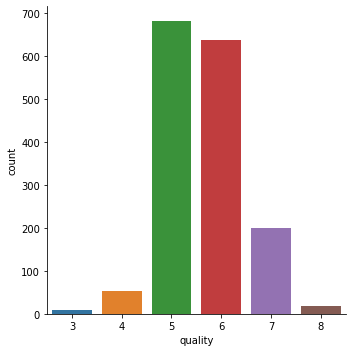

In [10]:
# number of values for each quality
sns.catplot(x='quality', data = Wine_Dataset, kind = 'count')

    From the graph se can say there are only 6 values of the quality 
    And from which we categorise them as good or bad quality based on these scores

    Hence, 
    - Values greater than equal to 6 will be considered as Good Quality
    - Values less than 6 will be considered as Bad Quality

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

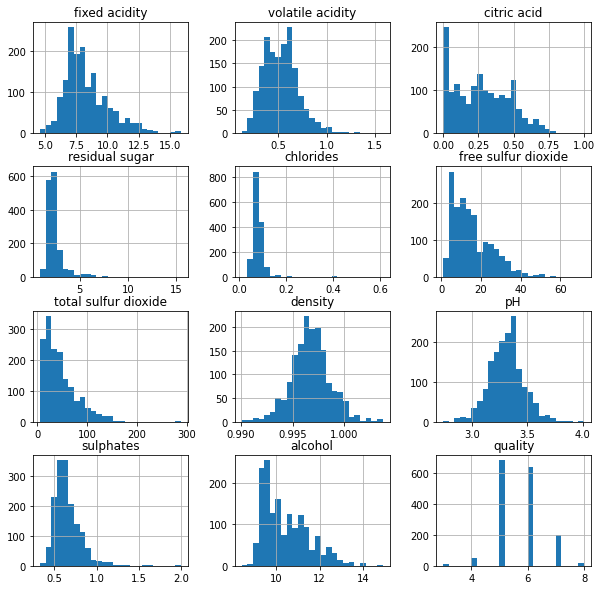

In [11]:
Wine_Dataset.hist(bins=25,figsize=(10,10))

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

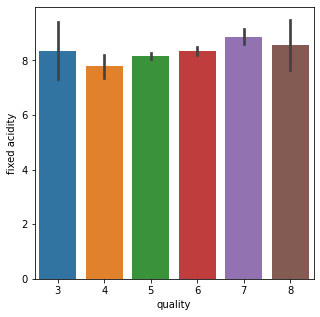

In [12]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

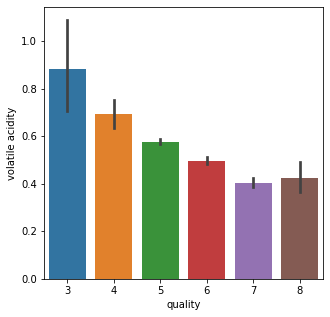

In [13]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

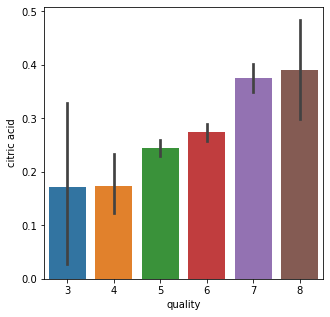

In [14]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

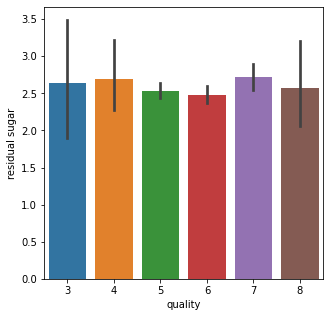

In [15]:
# residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

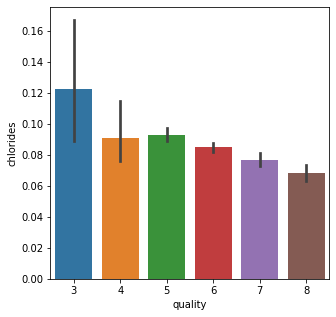

In [16]:
# chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

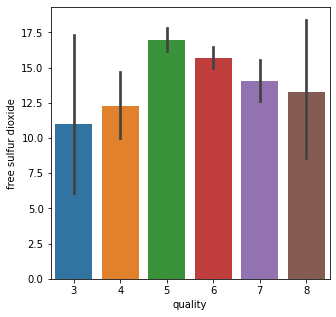

In [17]:
# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

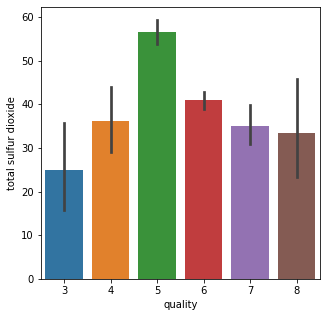

In [18]:
# total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='density'>

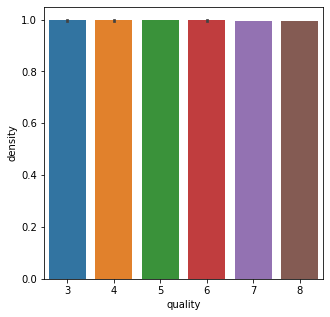

In [19]:
# density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='pH'>

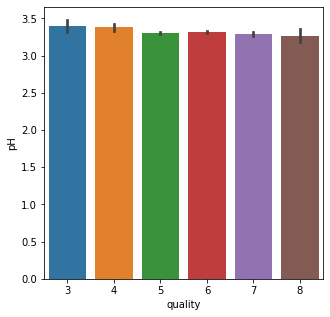

In [20]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

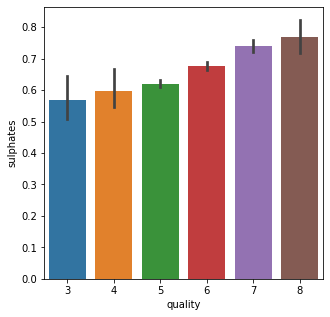

In [21]:
# sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = Wine_Dataset)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

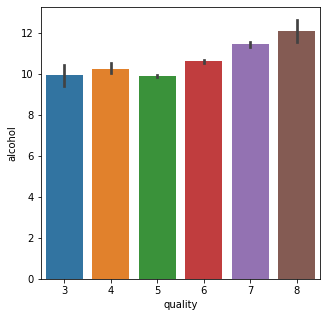

In [22]:
# alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = Wine_Dataset)

    Correlation

        There are 2 types

        1.Positive Correlation

        2.Negetive Correlation


In [23]:
# finding correlation in between all columns
correlation = Wine_Dataset.corr()

<AxesSubplot:>

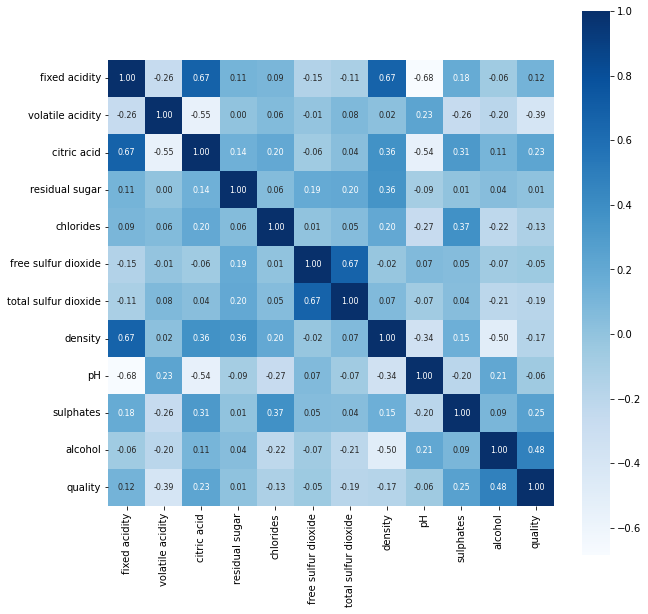

In [24]:
# making heatmap for visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

    This heatmap shows all correlation from this we can see some are giving positive impact on quality some give negetive impact on quality of wine

Data preprocessing

    Y(Label) = Value to be predicted in this case "quality"

    X(Data) = Data used to predict Y in this case all parameters except "quality"

In [25]:
# Seprating Data and Label
X = Wine_Dataset.drop('quality',axis=1) # droping quality

In [26]:
# checking if Data is seprated from Label or not
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
X.shape

(1599, 11)

In [28]:
list(X.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

    Data is seprated from Label

Label Binarizaton

    Here, we will categorize Label as good or bad 

    we will use 1 for Good and 0 for Bad Quality


In [29]:
Y = Wine_Dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

<AxesSubplot:title={'center':'Quality'}, ylabel='quality'>

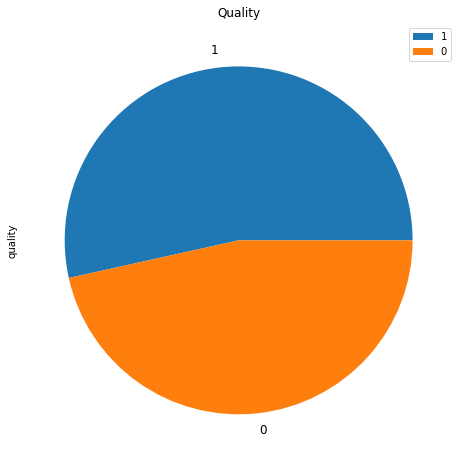

In [30]:
# number of values for each quality good and bad
#sns.catplot(x='quality', data = Y, kind = 'count')
Y.value_counts().plot.pie(figsize=(8,8),title="Quality",fontsize=12,legend=True)

    From the Above Graph we can see more than 50% of Wine is considered good 

In [31]:
print(Y.shape)

(1599,)


In [32]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


    Label is seprated and binarized

Train & Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [34]:
print( X.shape, X_train.shape, X_test.shape, Y.shape, Y_train.shape, Y_test.shape)

(1599, 11) (1279, 11) (320, 11) (1599,) (1279,) (320,)


    by summing the rows of train and test data we can see the Data is complete nothing is lost

Model Training

    Model used : Random Forest Classifier

In [35]:
# Making Model 
Model = RandomForestClassifier()

In [36]:
# training or Fitting the Model
Model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [37]:
# Accuracy on Test Data
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.840625


    So Our Model is more than 80% accurate

In [39]:
# Printing Classification Report
report=classification_report(Y_test, X_test_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       152
           1       0.85      0.85      0.85       168

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



Building a Predictive System

In [ ]:
print("Lets predict the quality of our Wine")
fixed_acidity = input("Enter the fixed acidity: ")
volatile_acidity = input("Enter the volatile acidity: ")
citric_acid = input("Enter the citric acid: ")
residual_sugar = input("Enter the residual sugar: ")
chlorides = input("Enter the chlorides: ")
free_sulfur_dioxide = input("Enter the free sulfur dioxide: ")
total_sulfur_dioxide = input("Enter the total sulfur dioxide: ")
density = input("Enter the density: ")
pH = input("Enter the pH: ")
sulphates = input("Enter the sulphates: ")
alcohol = input("Enter the alcohol: ")

input_data=(fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,
            total_sulfur_dioxide,density,pH,sulphates,alcohol)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

## Now making The file to store this model

In [40]:
# Importing pickle for making it possible
import pickle
pickle.dump(Model,open("Wine_quality_pred.pkl","wb"))